<h2> Table Tennis Match Predictor in Men's Single Category </h2>

<h4> First I'll clean up the data and make ready to perform some explanatory data analysis and machine learning. </h4>

In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd



player_rankings = pd.read_csv("player_data.csv").values.tolist()
matches = pd.read_csv("match_data.csv").values.tolist()


In [3]:
temp = dict()

numbers = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
player_rankings = [x for x in player_rankings if x[-1][0] not in numbers]
player_names = [x[0] for x in player_rankings]

for x in player_rankings:
    temp[x[0]] = x[2:]


In [4]:
usefull_matches = []


for match in matches:
    if match[0] in player_names and match[1] in player_names:
        usefull_matches.append(match)
        







In [5]:
ultimate_data = usefull_matches.copy()

In [6]:
for match in ultimate_data:

    match[0] = temp[match[0]]
    match[1] = temp[match[1]]



<p> Data has jointed to one row. In the first column there are attributes regarding the first player. In the second column there are seconds players attribute. In the last to columns we have the results of the match </p>

In [7]:
df = pd.DataFrame(ultimate_data)

df.head()

,0,1,2,3
0,"[552, 8.0, USA, 20, right, shakehand, 552, att...","[734, 116.15, Nigeria, 32, right, shakehand, 7...",4:0,1:0
1,"[421, 6.0, USA, 46, left, shakehand, 421, attack]","[284, 90.86, Spain, 26, right, shakehand, 284,...",0:4,0:1
2,"[571, 21.76, Republic, 31, right, shakehand, 5...","[280, 67.32, Slovakia, 23, left, shakehand, 28...",2:4,0:1
3,"[314, 98.78, USA, 28, left, shakehand, 314, at...","[735, 3.0, USA, 42, right, shakehand, 735, att...",4:0,1:0
4,"[119, 79.22, Japan, 30, right, shakehand, 119,...","[524, 20.19, Republic, 27, right, shakehand, 5...",4:2,1:0


In [8]:
def winner(x):
    scores = x.split(":")
    try:
        if scores[0] > scores[1]:
            return 1
        else:
            return 0
    except:
        return 0

df["winner"] = df[3].apply(winner)
df = df.drop(axis=1, columns=[3])
df.head()

,0,1,2,winner
0,"[552, 8.0, USA, 20, right, shakehand, 552, att...","[734, 116.15, Nigeria, 32, right, shakehand, 7...",4:0,1
1,"[421, 6.0, USA, 46, left, shakehand, 421, attack]","[284, 90.86, Spain, 26, right, shakehand, 284,...",0:4,0
2,"[571, 21.76, Republic, 31, right, shakehand, 5...","[280, 67.32, Slovakia, 23, left, shakehand, 28...",2:4,0
3,"[314, 98.78, USA, 28, left, shakehand, 314, at...","[735, 3.0, USA, 42, right, shakehand, 735, att...",4:0,1
4,"[119, 79.22, Japan, 30, right, shakehand, 119,...","[524, 20.19, Republic, 27, right, shakehand, 5...",4:2,1


<p> Now splitting the attributes of each players to new columns to interpret properly </p>

In [9]:
match_score = df[2]
df.drop(axis=1, columns=[2], inplace=True)

In [10]:
p1_df = df[0]
p2_df = df[1]

In [11]:
def ranking(x):
    return x[0]

def avg_point(x):
    return x[1]

def country(x):
    return x[2]

def age(x):
    return x[3]

def dominant_hand(x):
    return x[4]

def grip(x):
    return x[5]

def player_style(x):
    return x[7]


p1_data = pd.DataFrame()

p1_data["ranking"] = p1_df.apply(ranking)
p1_data["avg_point"] = p1_df.apply(avg_point)
p1_data["country"] = p1_df.apply(country)
p1_data["age"] = p1_df.apply(age)
p1_data["dominant_hand"] = p1_df.apply(dominant_hand)
p1_data["grip"] = p1_df.apply(grip)
p1_data["player_style"] = p1_df.apply(player_style)




In [12]:
p2_data = pd.DataFrame()

p2_data["ranking"] = p2_df.apply(ranking)
p2_data["avg_point"] = p2_df.apply(avg_point)
p2_data["country"] = p2_df.apply(country)
p2_data["age"] = p2_df.apply(age)
p2_data["dominant_hand"] = p2_df.apply(dominant_hand)
p2_data["grip"] = p2_df.apply(grip)
p2_data["player_style"] = p2_df.apply(player_style)


Looks like there are some false data in the data.

To address to issue I'll replace the 'history' data with 'right' since it is the most common domminant hand.

In [13]:
p1_data["dominant_hand"].value_counts()

right      5203
left       1752
history      53
Name: dominant_hand, dtype: int64

In [14]:
p1_data["dominant_hand"].replace("history", "right", inplace=True)
p1_data["dominant_hand"].value_counts()

right    5256
left     1752
Name: dominant_hand, dtype: int64

Lets check other categories

In [15]:
p2_data["dominant_hand"].value_counts()

right      5153
left       1804
history      51
Name: dominant_hand, dtype: int64

In [16]:
p2_data["dominant_hand"].replace("history", "right", inplace=True)
p2_data["dominant_hand"].value_counts()

right    5204
left     1804
Name: dominant_hand, dtype: int64

In [17]:
p1_data["grip"].value_counts()

shakehand       6728
penhold          227
(01.05.2022)      24
(01.10.2018)       8
(01.05.2018)       7
(01.05.2019)       6
(01.11.2019)       3
(01.09.2019)       3
(01.11.2022)       2
Name: grip, dtype: int64

In [18]:
p1_data["grip"].unique().tolist()

['shakehand',
 'penhold',
 '(01.05.2022)',
 '(01.11.2019)',
 '(01.11.2022)',
 '(01.10.2018)',
 '(01.09.2019)',
 '(01.05.2019)',
 '(01.05.2018)']

In [19]:
p1_data["grip"].replace(['(01.05.2022)',
 '(01.11.2019)',
 '(01.11.2022)',
 '(01.10.2018)',
 '(01.09.2019)',
 '(01.05.2019)',
 '(01.05.2018)'], ["shakehand", "shakehand","shakehand","shakehand","shakehand","shakehand","shakehand"], inplace=True)
p1_data["grip"].value_counts()

shakehand    6781
penhold       227
Name: grip, dtype: int64

In [20]:
p2_data["grip"].value_counts()

shakehand       6769
penhold          188
(01.05.2022)      24
(01.10.2018)      10
(01.05.2018)       5
(01.11.2022)       3
(01.09.2019)       3
(01.11.2019)       2
(01.05.2019)       2
(01.01.2023)       1
(01.06.2019)       1
Name: grip, dtype: int64

In [21]:
p2_data["grip"].unique().tolist()

['shakehand',
 '(01.01.2023)',
 'penhold',
 '(01.11.2019)',
 '(01.11.2022)',
 '(01.10.2018)',
 '(01.05.2022)',
 '(01.09.2019)',
 '(01.05.2018)',
 '(01.05.2019)',
 '(01.06.2019)']

In [22]:
p2_data["grip"].replace(['(01.01.2023)',
 '(01.11.2019)',
 '(01.11.2022)',
 '(01.10.2018)',
 '(01.05.2022)',
 '(01.09.2019)',
 '(01.05.2018)',
 '(01.05.2019)',
 '(01.06.2019)'], ["shakehand", "shakehand","shakehand","shakehand","shakehand","shakehand","shakehand", "shakehand", "shakehand"], inplace=True)
p2_data["grip"].value_counts()

shakehand    6820
penhold       188
Name: grip, dtype: int64

In [23]:
p1_data["player_style"].value_counts()

attack     6818
defence     137
(-1)         34
(+3)         14
(+4)          2
(+1)          2
(+2)          1
Name: player_style, dtype: int64

<p> Lastly I will fix the player style category. </p>

In [24]:
p1_data["player_style"].unique().tolist()

['attack', 'defence', '(+3)', '(-1)', '(+4)', '(+2)', '(+1)']

In [25]:
p1_data.replace([ '(+3)', '(-1)', '(+4)', '(+2)', '(+1)'], ["attack", "attack", "attack", "attack", "attack"], inplace=True)

In [26]:
p2_data["player_style"].unique().tolist()

['attack', '(+2)', 'defence', '(-1)', '(+4)', '(+3)', '(+1)']

In [27]:
p2_data.replace([ '(+3)', '(-1)', '(+4)', '(+2)', '(+1)'], ["attack", "attack", "attack", "attack", "attack"], inplace=True)

Okay know the data is ready to concat

In [28]:
final_data = pd.concat([p1_data, p2_data] ,keys=("p1", "p2") ,axis=1)
final_data["winner"] = df["winner"]
final_data.head()


p1                                                                \
  ranking avg_point   country age dominant_hand       grip player_style   
0     552      8.00       USA  20         right  shakehand       attack   
1     421      6.00       USA  46          left  shakehand       attack   
2     571     21.76  Republic  31         right  shakehand       attack   
3     314     98.78       USA  28          left  shakehand       attack   
4     119     79.22     Japan  30         right  shakehand      defence   

       p2                                                               winner  
  ranking avg_point   country age dominant_hand       grip player_style         
0     734    116.15   Nigeria  32         right  shakehand       attack      1  
1     284     90.86     Spain  26         right  shakehand       attack      0  
2     280     67.32  Slovakia  23          left  shakehand       attack      0  
3     735      3.00       USA  42         right  shakehand       attack      1  
4     524     20.19  Republic  27         right  shakehand       attack      1

Lets get the data of successful players.

In [29]:
winners = pd.DataFrame()

winners = pd.concat([final_data[final_data["winner"] == 0]["p2"], final_data[final_data["winner"] == 1]["p1"]], axis=0)



Text(0.5, 0, 'Grip')

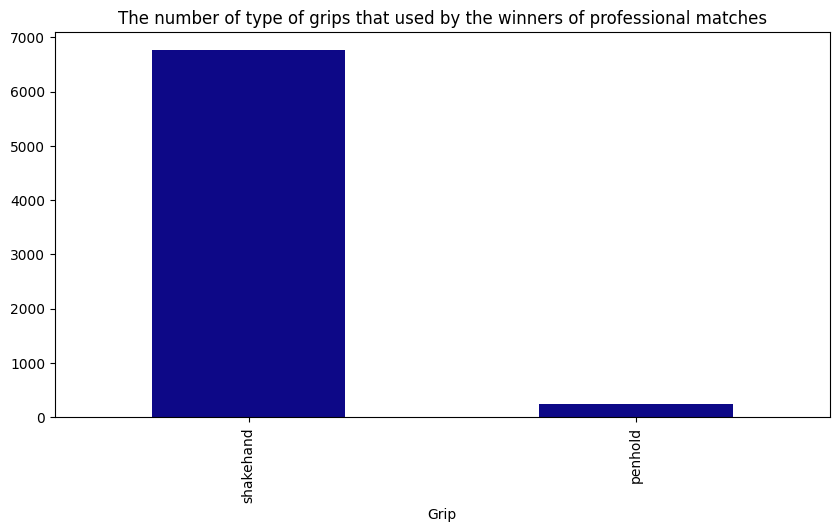

In [30]:
winners["grip"].value_counts().plot(kind="bar", figsize=(10, 5), colormap="plasma")
plt.title("The number of type of grips that used by the winners of professional matches")
plt.xlabel('Grip')


Text(0.5, 1.0, 'Number of age')

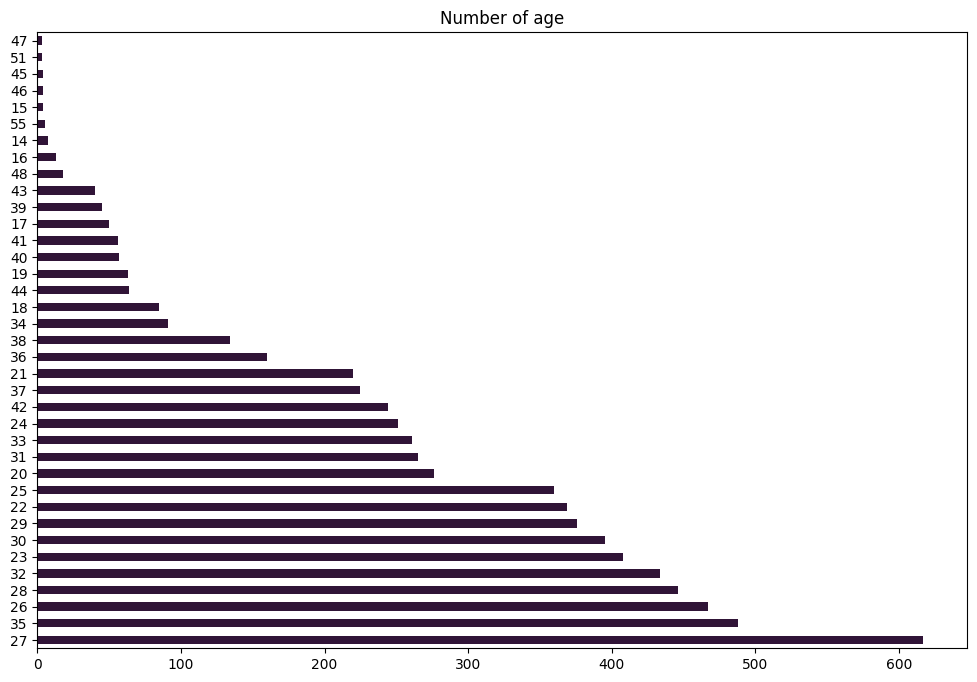

In [31]:
winners["age"].value_counts().plot(kind="barh", colormap="twilight_shifted", figsize=(12, 8))
plt.title('Number of age')

Text(0.5, 1.0, 'Which attack style had been prefered among the winners')

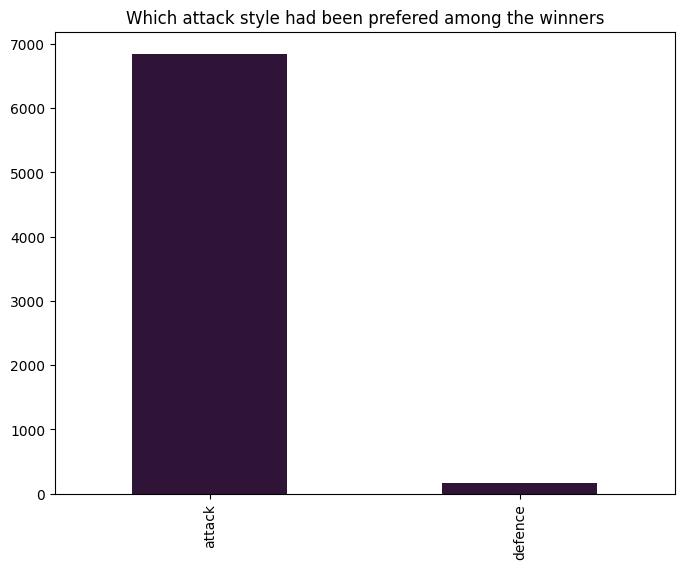

In [32]:
winners["player_style"].value_counts().plot(kind="bar", colormap="twilight_shifted", figsize=(8, 6))
plt.title('Which attack style had been prefered among the winners')

Turn categorical values to numeric values. Thus now our model will be able to interpret the values.

In [33]:
final_data = pd.DataFrame()

p1_data = pd.get_dummies(data=p1_data, columns=["country", "dominant_hand", "player_style", "grip"])
p2_data = pd.get_dummies(data=p2_data, columns=["country", "dominant_hand", "player_style", "grip"])

final_data = pd.concat([p1_data, p2_data],axis=1)
final_data.dropna(axis=1, inplace=True)
final_data["winner"] = df["winner"]



<p> Now its time to do some EDA </p>

In [34]:
import seaborn as sns

In [35]:
final_data.head()

,ranking,avg_point,age,country_Africa,country_Algeria,country_Angola,country_Arabia,country_Argentina,country_Australia,country_Austria,...,country_Yemen,country_Zambia,country_Zealand,dominant_hand_left,dominant_hand_right,player_style_attack,player_style_defence,grip_penhold,grip_shakehand,winner
0,552,8.00,20,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,1
1,421,6.00,46,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
2,571,21.76,31,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
3,314,98.78,28,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,1
4,119,79.22,30,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,1


<p> It is time to do some statistics to determine wich values are relevant to the outcome of a match and how strong this connection </p>

But first lets check is there any null value that may couse problem


In [36]:
final_data.isnull().sum().sum()

0

Okay we good to go

In [37]:
final_data.corr()["winner"]


ranking                -0.169956
avg_point               0.152234
age                     0.053469
country_Africa         -0.001435
country_Algeria        -0.032176
                          ...   
player_style_attack     0.044994
player_style_defence   -0.044994
grip_penhold           -0.036510
grip_shakehand          0.036510
winner                  1.000000
Name: winner, Length: 238, dtype: float64

Since we have to much column I am going to select only the ones that are correlation coefficients are bigger than 0.01 or less than -0.01

In [39]:
final_data = pd.DataFrame()

In [42]:
final_data = pd.concat([p1_data, p2_data],axis=1)
final_data.dropna(axis=1, inplace=True)

In [43]:
results = df["winner"]

Okay now Its time to start model the predictor.

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(final_data, results, test_size=0.25)

In [47]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

In [48]:
clf_A = LogisticRegression()

In [49]:
clf_A.fit(X_train,y_train)

c:\Users\dirim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
from sklearn.metrics import confusion_matrix, classification_report

In [51]:
predictions = clf_A.predict(X_test)

In [52]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68       825
           1       0.71      0.76      0.73       927

    accuracy                           0.71      1752
   macro avg       0.71      0.70      0.70      1752
weighted avg       0.71      0.71      0.71      1752



In [53]:
import pickle

In [54]:
pickle.dump(clf_A, open("match_predictor.pickle", "wb"))